In [158]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.cluster import KMeans
from scipy.stats import chi2_contingency
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [159]:
df1= pd.read_csv('KAG_conversion_data.csv')

In [160]:
df1.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [161]:
df1.tail()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710000,8,2
1142,1314415,1178,179982,45-49,F,114,513161,114,165.609999,5,2


In [162]:
df1.describe()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


In [163]:
df1.dtypes

ad_id                    int64
xyz_campaign_id          int64
fb_campaign_id           int64
age                     object
gender                  object
interest                 int64
Impressions              int64
Clicks                   int64
Spent                  float64
Total_Conversion         int64
Approved_Conversion      int64
dtype: object

In [164]:
age_group = pd.get_dummies(df1.age, prefix = 'age', prefix_sep = '_')
age_group

,age_30-34,age_35-39,age_40-44,age_45-49
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
1138,0,0,0,1
1139,0,0,0,1
1140,0,0,0,1
1141,0,0,0,1


In [165]:
gender_group = attrition = pd.get_dummies(df1.gender, prefix = 'gender', prefix_sep = '_')
gender_group

,gender_F,gender_M
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
1138,1,0
1139,1,0
1140,1,0
1141,1,0


In [166]:
X = pd.concat([df2, age_group, gender_group], axis = 1)
X

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,age_30-34,age_35-39,age_40-44,age_45-49,gender_F,gender_M
0,708746,916,103916,15,7350,1,1.430000,2,1,1,0,0,0,0,1
1,708749,916,103917,16,17861,2,1.820000,2,0,1,0,0,0,0,1
2,708771,916,103920,20,693,0,0.000000,1,0,1,0,0,0,0,1
3,708815,916,103928,28,4259,1,1.250000,1,0,1,0,0,0,0,1
4,708818,916,103928,28,4133,1,1.290000,1,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,109,1129773,252,358.189997,13,2,0,0,0,1,1,0
1139,1314411,1178,179978,110,637549,120,173.880003,3,0,0,0,0,1,1,0
1140,1314412,1178,179979,111,151531,28,40.289999,2,0,0,0,0,1,1,0
1141,1314414,1178,179981,113,790253,135,198.710000,8,2,0,0,0,1,1,0


<AxesSubplot:>

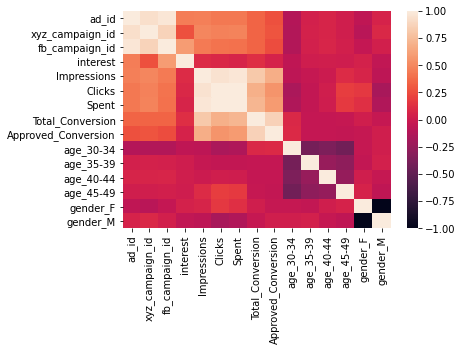

In [167]:
corr = X.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [168]:
X1 = X.drop(['ad_id', 'xyz_campaign_id','fb_campaign_id','interest'], axis = 1)
X1

,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,age_30-34,age_35-39,age_40-44,age_45-49,gender_F,gender_M
0,7350,1,1.430000,2,1,1,0,0,0,0,1
1,17861,2,1.820000,2,0,1,0,0,0,0,1
2,693,0,0.000000,1,0,1,0,0,0,0,1
3,4259,1,1.250000,1,0,1,0,0,0,0,1
4,4133,1,1.290000,1,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1138,1129773,252,358.189997,13,2,0,0,0,1,1,0
1139,637549,120,173.880003,3,0,0,0,0,1,1,0
1140,151531,28,40.289999,2,0,0,0,0,1,1,0
1141,790253,135,198.710000,8,2,0,0,0,1,1,0


<AxesSubplot:>

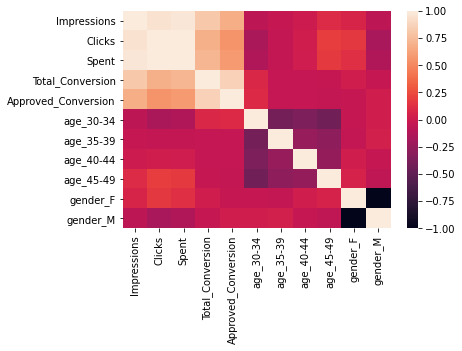

In [169]:
corr = X1.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [170]:
km = KMeans(n_clusters =5)
xfeatures = X1
clusters = km.fit_predict(xfeatures)
km.labels_

array([0, 0, 0, ..., 2, 4, 4], dtype=int32)

In [171]:
clusters is km.labels_

True

In [172]:
km.cluster_centers_

array([[3.09154602e+04, 5.53183024e+00, 8.30858091e+00, 1.27984085e+00,
        4.54907162e-01, 4.08488064e-01, 2.24137931e-01, 1.68435013e-01,
        1.98938992e-01, 4.68169761e-01, 5.31830239e-01],
       [1.05593859e+06, 1.94841270e+02, 2.99217936e+02, 1.24126984e+01,
        3.92063492e+00, 2.69841270e-01, 2.06349206e-01, 1.74603175e-01,
        3.49206349e-01, 6.19047619e-01, 3.80952381e-01],
       [2.42104682e+05, 4.23636364e+01, 6.58237273e+01, 3.04545455e+00,
        9.86363636e-01, 3.04545455e-01, 2.18181818e-01, 2.45454545e-01,
        2.31818182e-01, 4.27272727e-01, 5.72727273e-01],
       [2.16847700e+06, 3.02666667e+02, 5.00788334e+02, 3.23333333e+01,
        1.23333333e+01, 6.66666667e-01, 0.00000000e+00, 1.66666667e-01,
        1.66666667e-01, 3.33333333e-01, 6.66666667e-01],
       [5.73265480e+05, 1.05830000e+02, 1.61038800e+02, 6.53000000e+00,
        1.98000000e+00, 3.00000000e-01, 1.80000000e-01, 1.70000000e-01,
        3.50000000e-01, 6.30000000e-01, 3.70000000e-

In [173]:
X1['cluster'] = clusters
X1.tail()

,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,age_30-34,age_35-39,age_40-44,age_45-49,gender_F,gender_M,cluster
1138,1129773,252,358.189997,13,2,0,0,0,1,1,0,1
1139,637549,120,173.880003,3,0,0,0,0,1,1,0,4
1140,151531,28,40.289999,2,0,0,0,0,1,1,0,2
1141,790253,135,198.710000,8,2,0,0,0,1,1,0,4
1142,513161,114,165.609999,5,2,0,0,0,1,1,0,4


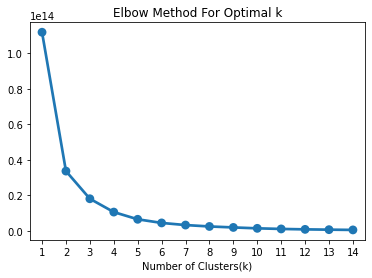

In [174]:
sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X1)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.title('Elbow Method For Optimal k')
plt.show()

In [175]:
KMean_clust = KMeans(n_clusters= 2, init= 'k-means++', max_iter= 1000)
KMean_clust.fit(X1)


KMeans(max_iter=1000, n_clusters=2)

In [182]:
X1.groupby(['Clicks', 'cluster']).count()

,,Impressions,Spent,Total_Conversion,Approved_Conversion,age_30-34,age_35-39,age_40-44,age_45-49,gender_F,gender_M
Clicks,cluster,,,,,,,,,,
0,0,207,207,207,207,207,207,207,207,207,207
1,0,119,119,119,119,119,119,119,119,119,119
2,0,70,70,70,70,70,70,70,70,70,70
3,0,51,51,51,51,51,51,51,51,51,51
4,0,34,34,34,34,34,34,34,34,34,34
...,...,...,...,...,...,...,...,...,...,...,...
340,3,1,1,1,1,1,1,1,1,1,1
346,1,1,1,1,1,1,1,1,1,1,1
353,3,1,1,1,1,1,1,1,1,1,1


In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='cluster', hue='Clicks', data=X1, palette='Reds_r')
plt.show()

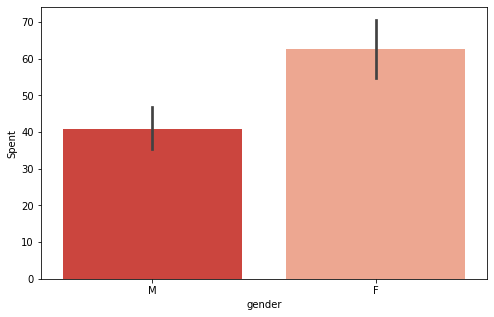

In [177]:
plt.figure(figsize=(8,5))
sns.barplot(x='gender', y='Spent', data=df1, palette='Reds_r')
plt.show()

The ad spending seems to be targeted more towards female customers which may imply that they sell more female products.
